In [1]:
import sys, os

import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, t

src_path = os.path.abspath(os.path.join('../src'))
sys.path.append(src_path)

from data import get_data, meta, OUTPUT_CHARTS, RAW_DATA
from plots import *

In [2]:
sns.set()

In [3]:
fig_folder = OUTPUT_CHARTS + '/young'
data = get_data()

vs_outliers = ['GB02-02', 'GB02-05']

In [10]:
display(multi_table([
    data.drop(vs_outliers).groupby("litologia")['e_din_seco'].describe()[['count', 'min', 'max', 'mean', 'std']].round(2),
    data.drop(vs_outliers).groupby("litologia")['e_din_sat'].describe()[['count', 'min', 'max', 'mean', 'std']].round(2),
    data[data["descartados_e"] == 0].groupby("litologia")['e_est_sat'].describe()[['count', 'min', 'max', 'mean', 'std']].round(2)
]))

display(multi_table([
    data.drop(vs_outliers).groupby("litologia")['poisson_din_seco'].describe()[['count', 'min', 'max', 'mean', 'std']].round(2),
    data.drop(vs_outliers).groupby("litologia")['poisson_din_sat'].describe()[['count', 'min', 'max', 'mean', 'std']].round(2)
]))

,count,min,max,mean,std
litologia,,,,,
Basalto Maciço,23.0,49.78,82.15,64.11,8.26
Basalto Vesiculado,4.0,17.26,40.37,26.12,10.25
Basalto Brechado,2.0,19.29,31.98,25.63,8.98
Basalto Hidrotermal,1.0,55.13,55.13,55.13,NaN
Peperito,4.0,24.18,41.97,30.86,7.83
Riolito,1.0,61.08,61.08,61.08,NaN
Arenito,1.0,11.21,11.21,11.21,NaN
,count,min,max,mean,std
litologia,,,,,


,count,min,max,mean,std
litologia,,,,,
Basalto Maciço,23.0,0.25,0.32,0.29,0.02
Basalto Vesiculado,4.0,0.02,0.38,0.28,0.17
Basalto Brechado,2.0,0.35,0.38,0.37,0.02
Basalto Hidrotermal,1.0,0.31,0.31,0.31,NaN
Peperito,4.0,0.34,0.35,0.34,0.00
Riolito,1.0,0.22,0.22,0.22,NaN
Arenito,1.0,0.18,0.18,0.18,NaN
,count,min,max,mean,std
litologia,,,,,


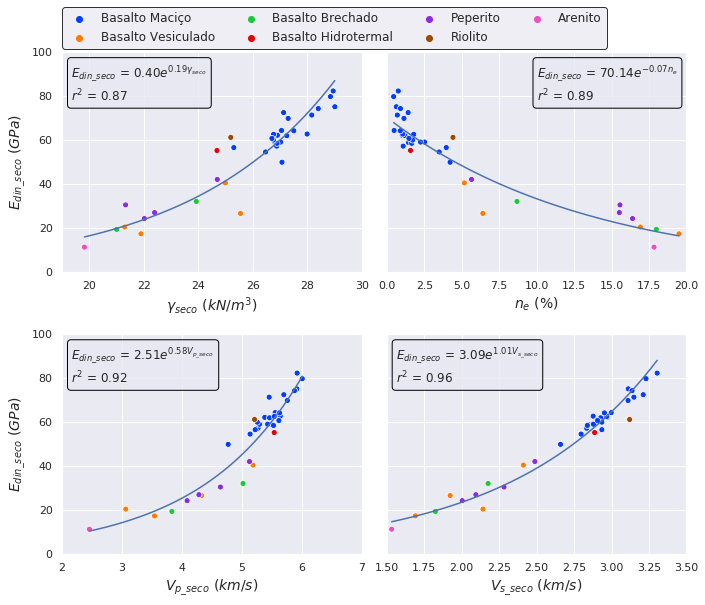

In [5]:
figure, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

formula = 'np.log(%s) ~ %s'

data_2 = data.drop(vs_outliers)

y = 'e_din_seco'
metay = meta[y]

x = 'p_esp_seco'
ax = plot_reg(x, y, data_2, ax=axes[0][0], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.03, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


x = 'porosidade_efetiva'
ax = plot_reg(x, y, data_2, ax=axes[0][1], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.50, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


x = 'vp_seco'
ax = plot_reg(x, y, data_2, ax=axes[1][0], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.03, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


x = 'vs_seco'
ax = plot_reg(x, y, data_2, ax=axes[1][1], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.03, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


plt.tight_layout()

ax = axes[0][0]
handles, labels = ax.get_legend_handles_labels()
idx = labels.index('litologia')
labels.pop(idx), handles.pop(idx)
ax.legend(handles=handles, labels=labels, prop={'size': 12}, frameon=True, edgecolor='black', bbox_to_anchor=(-0.02, 1.23), ncol=4, loc='upper left')

plt.savefig('%s/young_din_corr.png' % fig_folder, bbox_inches='tight', dpi=150)
plt.show()

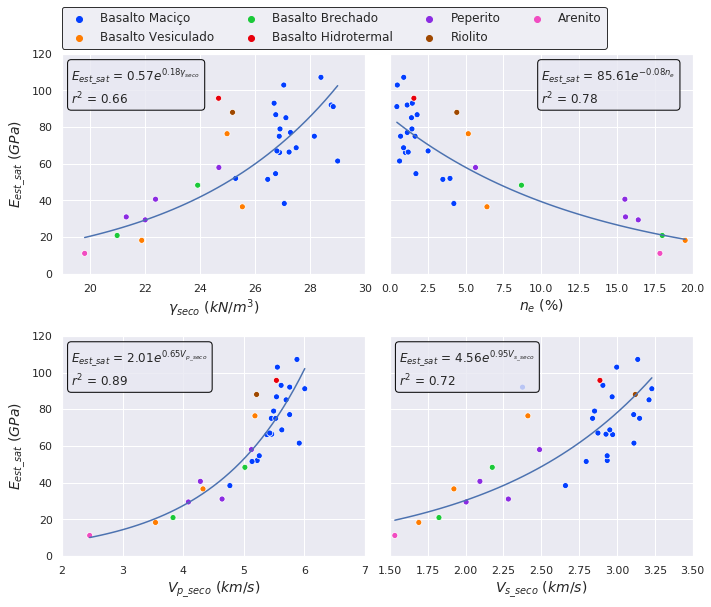

In [6]:
figure, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

formula = 'np.log(%s) ~ %s'

data_2 = data[data["descartados_e"] == 0]

y = 'e_est_sat'
metay = meta[y]

x = 'p_esp_seco'
ax = plot_reg(x, y, data_2, ax=axes[0][0], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.03, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


x = 'porosidade_efetiva'
ax = plot_reg(x, y, data_2, ax=axes[0][1], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.50, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


x = 'vp_seco'
ax = plot_reg(x, y, data_2, ax=axes[1][0], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.03, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


x = 'vs_seco'
ax = plot_reg(x, y, data_2, ax=axes[1][1], log_y=True)
ax.get_legend().remove()

result = ols(formula=formula % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$ e^{%.2f %s}$ \n$r^2$ = %.2f' % (metay['symbol'],np.exp(result.params[0]), result.params[1], meta[x]['symbol'], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.03, 0.94, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


plt.tight_layout()

ax = axes[0][0]
handles, labels = ax.get_legend_handles_labels()
idx = labels.index('litologia')
labels.pop(idx), handles.pop(idx)
ax.legend(handles=handles, labels=labels, prop={'size': 12}, frameon=True, edgecolor='black', bbox_to_anchor=(-0.02, 1.24), ncol=4, loc='upper left')

plt.savefig('%s/young_est_corr.png' % fig_folder, bbox_inches='tight', dpi=150)
plt.show()

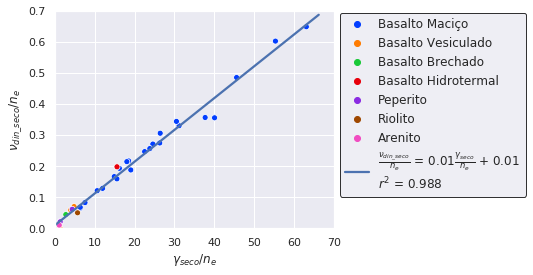

In [13]:
figure, ax = plt.subplots(1, 1, figsize=(5, 4))

data_2 =  data.drop(vs_outliers)

y = 'poisson_ne'
x = 'p_esp_ne'

data_2[x] = data_2['p_esp_seco'] / data_2['porosidade_efetiva']
data_2[y] = data_2['poisson_din_seco'] / data_2['porosidade_efetiva']

result = ols(formula='%s ~ %s' % (y, x), data=data_2).fit()
label = '$%s$ = %.2f$%s$ + %.2f \n$r^2$ = %.3f' % (
    '\\frac{%s}{%s}' % (meta['poisson_din_seco']['symbol'], meta['porosidade_efetiva']['symbol']),
    result.params[1], 
    '\\frac{%s}{%s}' % (meta['p_esp_seco']['symbol'], meta['porosidade_efetiva']['symbol']),
    result.params[0], 
    result.rsquared
)

sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
sns.regplot(x=x, y=y, data=data_2, scatter=False, ci=False, ax=ax, label=label)
ax.set_xlabel( '$%s/%s$' % (meta['p_esp_seco']['symbol'], meta['porosidade_efetiva']['symbol']))
ax.set_ylabel( '$%s/%s$' % (meta['poisson_din_seco']['symbol'], meta['porosidade_efetiva']['symbol']))
ax.set_xlim([0, 70])
ax.set_ylim([0, 0.7])

handles, labels = ax.get_legend_handles_labels()
handles, labels = [*handles[2:], handles[0]], [*labels[2:], labels[0]]
ax.legend(handles=handles, labels=labels, prop={'size': 12}, frameon=True, edgecolor='black', bbox_to_anchor=(1, 1.02), loc=2)

plt.savefig('%s/corr_poison_p_esp.png' % (fig_folder), bbox_inches='tight', dpi=120)
plt.show()

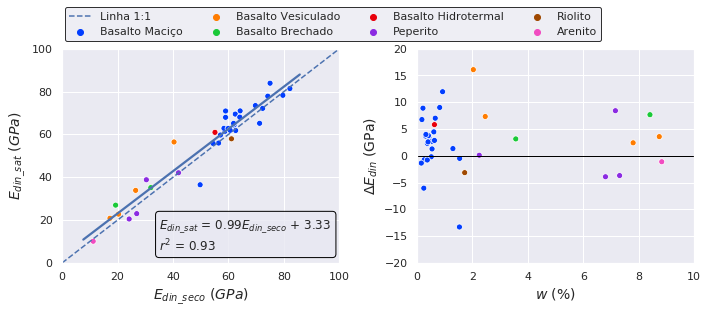

In [42]:
figure, axes = plt.subplots(1, 2, figsize=(10, 4))

data_2 = data.drop(vs_outliers)

x, y = 'e_din_seco', 'e_din_sat'

ax = axes[0]
sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
sns.regplot(x=x, y=y, data=data_2, scatter=False, ci=False, ax=ax)

ax.plot(meta[x]['limits'], meta[y]['limits'], '--b', label='Linha 1:1')
format_ax(x, y, ax)
ax.get_legend().remove()

result = ols(formula='%s ~ %s' % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$%s$ + %.2f \n$r^2$ = %.2f' % (meta[y]['symbol'], result.params[1], meta[x]['symbol'], result.params[0], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.35, 0.21, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


data_2['delta_e'] = data_2['e_din_sat'] - data_2['e_din_seco']

x, y = 'teor_umidade', 'delta_e'
ax = axes[1]
sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
format_ax(x, None, ax)
ax.set_ylabel('$\Delta E_{din}$ (GPa)', fontsize=14)
ax.axhline(c='black', lw=1)
ax.get_legend().remove()
ax.set_ylim([-20, 20])

plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
handles.pop(1), labels.pop(1)
axes[0].legend(handles=handles, labels=labels, prop={'size': 11}, frameon=True, edgecolor='black', bbox_to_anchor=(-0.01, 1.22), ncol=4, loc='upper left')

plt.savefig('%s/young_sat.png' % fig_folder, bbox_inches='tight', dpi=120)
plt.show()

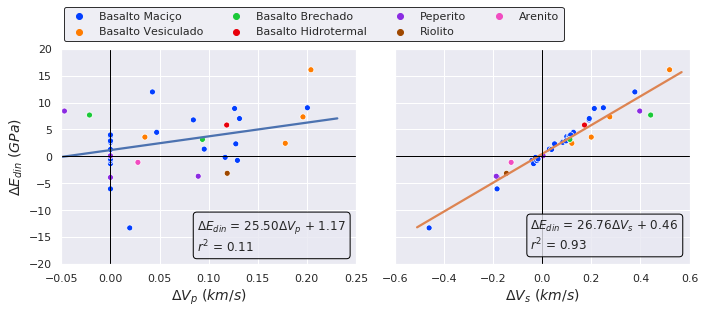

In [39]:
figure, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

data_2 = data.drop(vs_outliers)

data_2['prop_vs'] = data_2['vs_sat'] - data_2['vs_seco']
data_2['prop_vp'] = data_2['vp_sat'] - data_2['vp_seco']
data_2['prop_e_din'] = data_2['e_din_sat'] - data_2['e_din_seco']

data_2['shear_mod_seco'] = data_2['vp_sat'] - data_2['vp_seco']
data_2['shear_mod_sat'] = data_2['vp_sat'] - data_2['vp_seco']


y = 'prop_e_din'
meta[y] = {
    'limits': np.array([-20, 20]),
    'unit': 'GPa',
    'symbol': '\Delta E_{din}'    
}

meta['prop_vp'] = {
    'limits': np.array([-0.05, 0.25]),
    'unit': 'km/s',
    'symbol': '\Delta V_{p}'    
}

meta['prop_vs'] = {
    'limits': np.array([-0.6, 0.6]),
    'unit': 'km/s',
    'symbol': '\Delta V_{s}'    
}


for i, x in enumerate(['prop_vp', 'prop_vs']):
    ax = axes[i]
    sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
    sns.regplot(x=x, y=y, data=data_2, scatter=False, ci=False, ax=ax)

    ax.get_legend().remove()
    format_ax(x, y, ax)
    
    result = ols(formula='%s ~ %s' % (y, x), data=data_2).fit()
    text = '$%s$ = %.2f$%s$ + %.2f \n$r^2$ = %.2f' % (meta[y]['symbol'], result.params[1], meta[x]['symbol'], result.params[0], result.rsquared)
    props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
    ax.text(0.46, 0.21, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.axvline(c='black', lw=1)
    ax.axhline(c='black', lw=1)

plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon=True, edgecolor='black', bbox_to_anchor=(-0.01, 1.22), ncol=4, loc='upper left')

plt.savefig('%s/delta_e_x_delta_vp_vs.png' % fig_folder, bbox_inches='tight', dpi=120)
plt.show()

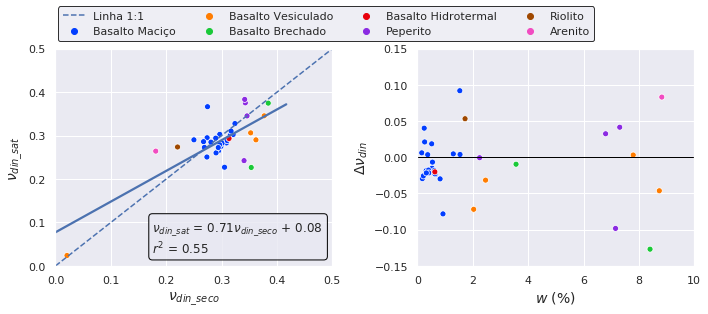

In [37]:
figure, axes = plt.subplots(1, 2, figsize=(10, 4))

data_2 = data.drop(vs_outliers) #.drop(['QD05-01'])

x, y = 'poisson_din_seco', 'poisson_din_sat'

ax = axes[0]
sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
sns.regplot(x=x, y=y, data=data_2, scatter=False, ci=False, ax=ax)

ax.plot(meta[x]['limits'], meta[y]['limits'], '--b', label='Linha 1:1')
format_ax(x, y, ax)
ax.get_legend().remove()

result = ols(formula='%s ~ %s' % (y, x), data=data_2).fit()
text = '$%s$ = %.2f$%s$ + %.2f \n$r^2$ = %.2f' % (meta[y]['symbol'], result.params[1], meta[x]['symbol'], result.params[0], result.rsquared)
props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
ax.text(0.35, 0.21, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


data_2['delta_poisson'] = data_2['poisson_din_sat'] - data_2['poisson_din_seco']

x, y = 'teor_umidade', 'delta_poisson'
ax = axes[1]
sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
format_ax(x, None, ax)
ax.set_ylabel('$\Delta \\nu_{din}$', fontsize=14)
ax.axhline(c='black', lw=1)
ax.get_legend().remove()
ax.set_ylim([-0.15, 0.15])

plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
handles.pop(1), labels.pop(1)
axes[0].legend(handles=handles, labels=labels, prop={'size': 11}, frameon=True, edgecolor='black', bbox_to_anchor=(-0.01, 1.22), ncol=4, loc='upper left')

plt.savefig('%s/poisson_sat.png' % fig_folder, bbox_inches='tight', dpi=120)
plt.show()

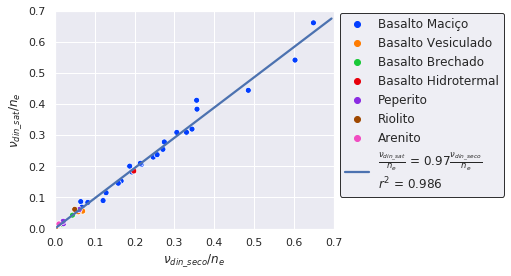

In [17]:
figure, ax = plt.subplots(1, 1, figsize=(5, 4))

data_2 =  data.drop(vs_outliers)

y = 'poisson_seco_ne'
x = 'poisson_sat_ne'

data_2[x] = data_2['poisson_din_seco'] / data_2['porosidade_efetiva']
data_2[y] = data_2['poisson_din_sat'] / data_2['porosidade_efetiva']

result = ols(formula='%s ~ %s' % (y, x), data=data_2).fit()
label = '$%s$ = %.2f$%s$ \n$r^2$ = %.3f' % (
    '\\frac{%s}{%s}' % (meta['poisson_din_sat']['symbol'], meta['porosidade_efetiva']['symbol']),
    result.params[1], 
    '\\frac{%s}{%s}' % (meta['poisson_din_seco']['symbol'], meta['porosidade_efetiva']['symbol']),
    result.rsquared
)

sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
sns.regplot(x=x, y=y, data=data_2, scatter=False, ci=False, ax=ax, label=label)
ax.set_xlabel( '$%s/%s$' % (meta['poisson_din_seco']['symbol'], meta['porosidade_efetiva']['symbol']))
ax.set_ylabel( '$%s/%s$' % (meta['poisson_din_sat']['symbol'], meta['porosidade_efetiva']['symbol']))
ax.set_xlim([0, 0.7])
ax.set_ylim([0, 0.7])

handles, labels = ax.get_legend_handles_labels()
handles, labels = [*handles[2:], handles[0]], [*labels[2:], labels[0]]
ax.legend(handles=handles, labels=labels, prop={'size': 12}, frameon=True, edgecolor='black', bbox_to_anchor=(1, 1.02), loc=2)

plt.savefig('%s/corr_poison.png' % (fig_folder), bbox_inches='tight', dpi=120)
plt.show()

'média e_din_seco/e_est_sat = 0.84'

'média e_din_sat/e_est_sat = 0.89'

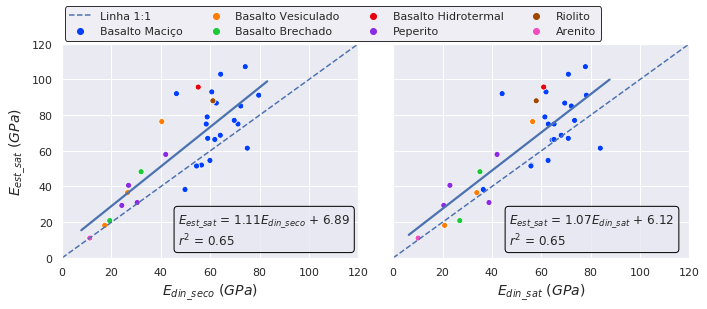

In [33]:
figure, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

data_2 =  data[data["descartados_e"] == 0]

y = 'e_est_sat'

for i, x in enumerate(['e_din_seco', 'e_din_sat']):
    display('média %s/%s = %.2f' % (x, y, (data_2[x]/data_2[y]).mean()))
    
    ax = axes[i]

    plt.gca().set_prop_cycle(None)
    sns.scatterplot(x=x, y=y, hue='litologia', data=data_2, ax=ax, palette='bright')
    sns.regplot(x=x, y=y, data=data_2, scatter=False, ci=False, ax=ax)

    ax.plot([0, 120], [0, 120], '--b', label='Linha 1:1')
    format_ax(x, y, ax)
    ax.set_xlim([0, 120])
    ax.get_legend().remove()

    result = ols(formula='%s ~ %s' % (y, x), data=data_2).fit()
    text = '$%s$ = %.2f$%s$ + %.2f \n$r^2$ = %.2f' % (meta[y]['symbol'], result.params[1], meta[x]['symbol'], result.params[0], result.rsquared)
    props = dict(boxstyle='round', facecolor=(0.91, 0.91, 0.95, 0.8), edgecolor='black')
    ax.text(0.39, 0.21, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)


plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
handles.pop(1)
labels.pop(1)
axes[0].legend(handles=handles, labels=labels, prop={'size': 11}, frameon=True, edgecolor='black', bbox_to_anchor=(-0.01, 1.20), ncol=4, loc='upper left')

plt.savefig('%s/young_din_est.png' % fig_folder, bbox_inches='tight', dpi=120)
plt.show()

In [19]:
x = ['vp_seco']
y = 'e_est_sat'
metay = meta[y]

model_data = data[data["descartados_e"] == 0].copy()

## outliers 
#model_data = model_data[[y, 'litologia', *x]].drop(['GB02-03', 'QD03-02'])

formula = 'np.log(%s) ~ %s' % (y, ' + '.join(x))
#formula = 'np.log(%s) ~ %s' % (y, ' + '.join(['np.log(%s)' % v for v in x]))

## Non-standardized regression
result_5 = ols(formula=formula, data=model_data).fit()
to_display = [result_5.summary()]

## Tests for multicolinearity
if len(x) > 1:
    
    ## Standardized regression
    std_data = model_data.copy()
    for var in x:
        std_data[var] = (std_data[var] - std_data[var].mean()) / std_data[var].std()

    result_5_std = ols(formula=formula, data=std_data).fit()
    #to_display.append(result_5_std.summary())

    ## VIF
    vif = pd.DataFrame([variance_inflation_factor(std_data[x].values, i) for i in range(len(x))], columns=['VIF'], index=[x])
    to_display.append(vif)
    
f_test_ss = pd.DataFrame([
    [result_5.df_model, result_5.ess, result_5.ess/result_5.df_model],
    [result_5.df_resid, result_5.ssr, result_5.ssr/result_5.df_resid],
    [result_5.df_resid + result_5.df_model, result_5.ssr + result_5.ess],
], columns=['df', 'sum_of_squares', 'mean_square'], index=['regression', 'residuals', 'total'])
to_display.append(f_test_ss)
    
display(multi_table(to_display))

In [20]:
alpha = 0.05
prediction = np.log(model_data[[y]]).join(result_5.get_prediction().summary_frame(alpha=alpha))
prediction['resid'] = prediction[y] - prediction['mean']
prediction['std_resid'] = result_5.get_influence().resid_studentized_internal
#prediction['std_resid'] = result_5.resid_pearson

back_prediction = np.exp(prediction)

prediction = prediction.join(model_data['litologia'])
back_prediction = back_prediction.join(model_data['litologia'])

In [21]:
alpha = 0.05
prev_factors = []
for alpha in np.arange(0.05, 1, 0.05):
    pred = np.exp(result_5.get_prediction().summary_frame(alpha=alpha))
    
    conf_level = '%.0f%%' % ((1 - alpha) * 100)
    factor_inf = ols(formula='obs_ci_lower ~ mean', data=pred).fit().params[1]
    factor_sup = ols(formula='obs_ci_upper ~ mean', data=pred).fit().params[1]
    prev_factors.append([conf_level, factor_inf, factor_sup, alpha])

prev_factors = pd.DataFrame(prev_factors, columns=['conf_level', 'lower_factor', 'upper_factor', 'alpha'])
prev_factors['lower_factor'] = np.round(prev_factors['lower_factor'], 3)
prev_factors['upper_factor'] = np.round(prev_factors['upper_factor'], 3)
prev_factors = prev_factors.set_index('alpha')
display(prev_factors)


,conf_level,lower_factor,upper_factor
alpha,,,
0.05,95%,0.688,1.453
0.10,90%,0.733,1.364
0.15,85%,0.763,1.310
0.20,80%,0.787,1.271
0.25,75%,0.807,1.239
0.30,70%,0.825,1.213
0.35,65%,0.841,1.190
0.40,60%,0.855,1.169
0.45,55%,0.869,1.150


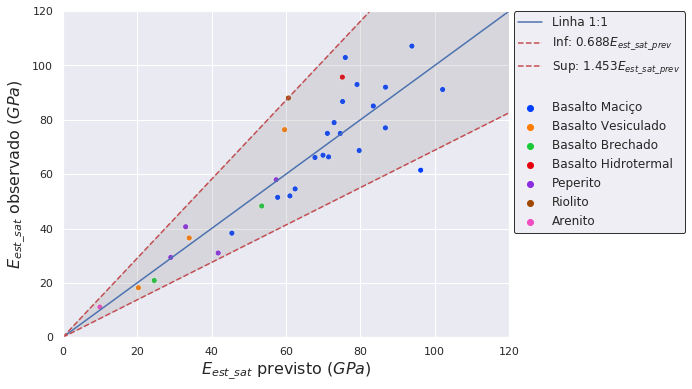

In [31]:
limits = np.array([0, 120])

f, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.lineplot(x=limits, y=limits, ax=ax, label='Linha 1:1')
sns.scatterplot(x='mean', y=y, data=back_prediction, hue='litologia', palette='bright', ax=ax)

## prediction interval
lower_fac = ols(formula='obs_ci_lower ~ mean', data=back_prediction).fit().params[1]
lower = limits * lower_fac

upper_fac = ols(formula='obs_ci_upper ~ mean', data=back_prediction).fit().params[1]
upper = limits * upper_fac

lb = '%.3f${%s}_{\_prev}}$'
ax.plot(limits, lower, 'r--', label='Inf: ' + lb % (lower_fac, metay['symbol']))
ax.plot(limits, upper, 'r--', label='Sup: ' + lb % (upper_fac, metay['symbol']))
ax.fill_between(limits,  lower,  upper, color='#888888', alpha=0.2)

ax.set_xlim(limits)
ax.set_ylim(limits)
ax.set_xlabel('$%s$ previsto ($%s$)' % (metay['symbol'], metay['unit']), fontsize=16)
ax.set_ylabel('$%s$ observado ($%s$)' % (metay['symbol'], metay['unit']), fontsize=16)
legend = ax.legend(prop={'size': 12}, frameon=True, edgecolor='black', loc=(1.01, 0.32))
legend.texts[3].set_text('')

plt.savefig('%s/young_model_prediction.png' % (fig_folder), bbox_inches='tight', dpi=130)
plt.show()

,e_est_sat,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,resid,std_resid,litologia
codigo,,,,,,,,,,


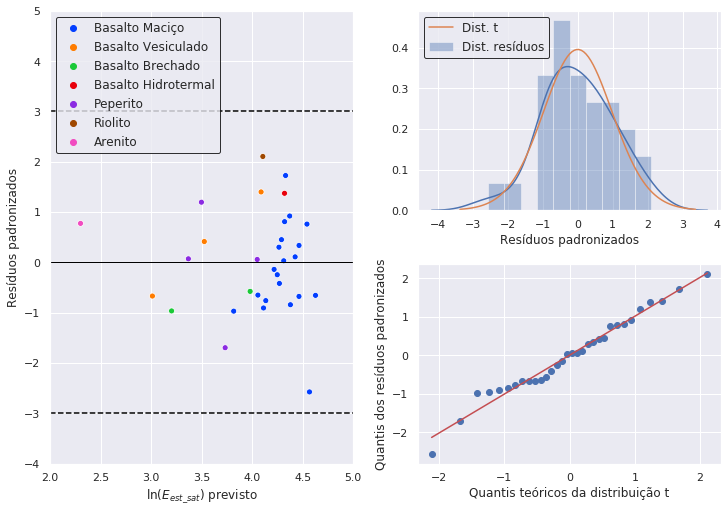

In [23]:
fig = plt.figure(constrained_layout=True, figsize=(10, 7))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

## Standardized Residuals
ax = ax1
sns.scatterplot(x='mean', y='std_resid', data=prediction, hue='litologia', palette='bright', ax=ax)

ax.axhline(3, ls='--', c='black')
ax.axhline(-3, ls='--', c='black')
ax.set_xlim(2, 5)
ax.set_ylim(-4, 5)
ax.axhline(linewidth=1, color='black')
ax.set_xlabel('ln($E_{est\_sat}$) previsto')
ax.set_ylabel('Resíduos padronizados')

handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles=handles[1:], labels=labels[1:], prop={'size': 12}, frameon=True, edgecolor='black', loc=2)

outliers = prediction[prediction['std_resid'].abs() >= 3]
display(outliers)


## Histogram
ax = ax2
sns.distplot(prediction['std_resid'], ax=ax, bins=10, label='Dist. resíduos')

df = result_5.nobs-1
t_dist = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), 100)
sns.lineplot(x=t_dist, y=t.pdf(t_dist, df), ax=ax, label='Dist. t')

ax.set_xlabel('Resíduos padronizados')
ax.legend(prop={'size': 12}, frameon=True, edgecolor='black', loc=2)

## Q-Q plot
ax = ax3
probplot(prediction['std_resid'], dist=t, sparams=(df), fit=False, plot=ax)
ax.set_title('')
ax.set_xlabel('Quantis teóricos da distribuição t')
ax.set_ylabel('Quantis dos resíduos padronizados')

plt.savefig('%s/young_residuals.png' % (fig_folder), bbox_inches='tight', dpi=200)
plt.show()

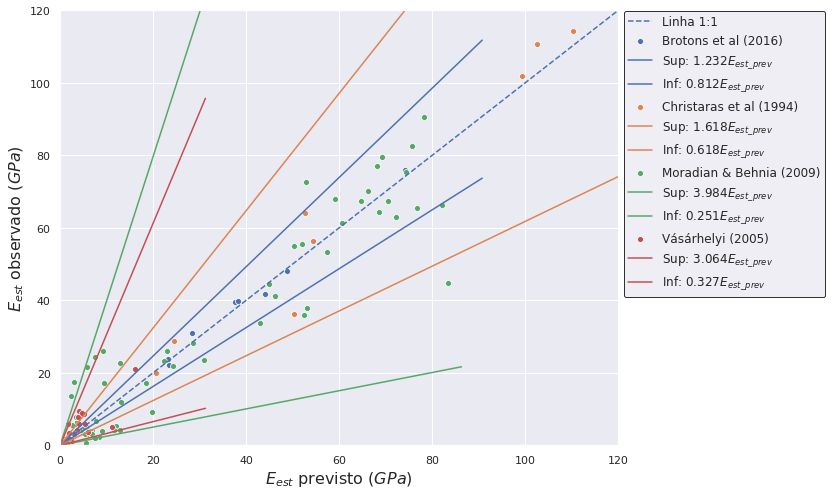

In [52]:
biblio_data = pd.read_csv(RAW_DATA + '/e_bibliografia.csv', sep=';').set_index('ref')

f, ax = plt.subplots(1, 1, figsize=(10, 8))

formulas = dict(
    vasarhelyi_2005 = 'np.log(e_obs) ~ var1',
    brotons_2016 = 'np.log(e_obs) ~ np.log(var1) + np.log(var2)',
    christaras_1994 = 'np.log(e_obs) ~ var1',
    moradian_2009 = 'np.log(e_obs) ~ np.log(var1)'
)

lb = '%.3f${%s}_{\_prev}}$'
metae = {
    'limits': np.array([0, 120]),
    'unit': 'GPa',
    'symbol': 'E_{est}'
}

ax.plot([0, 160], [0, 160], '--b', label='Linha 1:1')

for ref, ref_data in biblio_data.groupby(['ref']):    

    result = ols(formula=formulas[ref], data=ref_data).fit()
    summary = np.exp(result.get_prediction().summary_frame())
    
    factor_inf = ols(formula='obs_ci_lower ~ mean', data=summary).fit().params[1]
    factor_sup = ols(formula='obs_ci_upper ~ mean', data=summary).fit().params[1]    
    
    limits = pd.Series([0, summary['mean'].max() + 15])

    color = next(ax._get_lines.prop_cycler)['color']
    
    sns.lineplot(x=limits, y=limits * factor_sup, ax=ax, label='Sup: ' + lb % (factor_sup, metae['symbol']), c=color)
    sns.lineplot(x=limits, y=limits * factor_inf, ax=ax, label='Inf: ' + lb % (factor_inf, metae['symbol']), c=color)
    
    sns.scatterplot(x='e_pred', y='e_obs', data=ref_data, c=[color], ax=ax, label=ref_data['referencia'].unique()[0])
    

ax.set_xlim([0, 120])
ax.set_ylim([0, 120])
ax.set_xlabel('$%s$ previsto ($%s$)' % (metae['symbol'], metae['unit']), fontsize=16)
ax.set_ylabel('$%s$ observado ($%s$)' % (metae['symbol'], metae['unit']), fontsize=16)
    
handles, labels = ax.get_legend_handles_labels()
handles = [
    handles[0],
    handles[9], *handles[1:3],
    handles[10], *handles[3:5],
    handles[11], *handles[5:7],
    handles[12], *handles[7:9],
]
labels = [
    labels[0],
    labels[9], *labels[1:3],
    labels[10], *labels[3:5],
    labels[11], *labels[5:7],
    labels[12], *labels[7:9],
]
ax.legend(handles=handles, labels=labels, prop={'size': 12}, frameon=True, edgecolor='black', loc=(1.01, 0.34))

plt.savefig('%s/e_est_biblio.png' % (fig_folder), bbox_inches='tight', dpi=120)
plt.show()